# First-Cut Run 68 $\gamma$ and Neutron Direct Backgrounds

My notebook N-MISC-18-003 shows (pgs 49 and 51) simulations that were started to assess the direct gamma and neutron backgrounds for a Pu/Be source running in the K100 Run 68 setup. Specifically testing out the .h5 files created using the scripts mentioned on pg 52 of the above notebook reference. 

In [1]:
#play around with some hits data stored in h5 file
#===============to suppress h5py warning see:
#https://github.com/h5py/h5py/issues/961
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import h5py
warnings.resetwarnings()
f = h5py.File("/data/chocula/villaa/k100Sim_Data/captureCalhdf5/Run68_gdirect_bknd_R68_PuBe_0x0005_1549439935.h5","r")

for i in f:
    print(i)

hits = f['geant4/hits']

geant4


In [2]:
import numpy as np
print(np.shape(hits))
print(hits[0,:])

(1838004, 22)
[ 8.20000000e+01  1.00000000e+03  1.00118000e+05  0.00000000e+00
  2.11200000e+03  3.00721013e-08  0.00000000e+00  6.60568498e-03
  5.19294799e-03 -7.57669727e-03 -2.64559290e+02 -3.98541790e+02
  6.19032837e+02  3.48247508e+06  6.44645682e-03  1.65848813e-03
  3.49313911e-03 -2.79400000e+02 -4.02359879e+02  6.10991107e+02
  3.47526002e+06  0.00000000e+00]


In [3]:
#try to label events with consecutive and unique labels
ev = hits[:,0]

diffs = np.append(np.diff(ev),1)
diff_divide = np.copy(diffs)
diff_divide[diff_divide==0] = 1 #replace some elements with unity
diffs = diffs/diff_divide
#print(diffs[0:300])
#print(diff_divide[0:300])

newev = np.cumsum(diffs)
print(newev[0:300])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 5. 5. 5. 5. 6. 6. 6. 6. 6. 6. 6. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 8. 8. 8. 8. 8. 8. 9. 9. 9.
 9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9. 9.]


In [4]:
#select the poly block
cPoly = np.zeros(np.shape(hits)[0],dtype=bool)


cPoly[(hits[:,1]==1000)] = True
print(np.sum(cPoly))
print(np.shape(cPoly))
print(np.shape(hits))

1818616
(1838004,)
(1838004, 22)


In [5]:
#reminder of file structure
#EV  DT  TS  P Type  E1  D3  PX3 PY3 PZ3 X3  Y3  Z3  time3 PX1 PY1 PZ1 X1  Y1  Z1  time1 nCap
#python index below
#0    1   2 3   4     5   6   7   8   9  10  11  12    13   14  15  16 17  18  19   20    21

In [6]:
#I want to find the edges in Y because those are the places the poly surfaces that I'm interested in are.
#I can do that by a histogram

#first some hit-level cuts
cHVDet = np.zeros(np.shape(hits)[0],dtype=bool)
cZeroEdep = np.zeros(np.shape(hits)[0],dtype=bool)
cNeutron = np.zeros(np.shape(hits)[0],dtype=bool)
cGamma = np.zeros(np.shape(hits)[0],dtype=bool)
cPY3neg = np.zeros(np.shape(hits)[0],dtype=bool)

cHVDet[hits[:,1]==1] = True
cZeroEdep[hits[:,6]==0] = True
cNeutron[hits[:,4]==2112] = True
cGamma[hits[:,4]==22] = True
cPY3neg[hits[:,8]<0] = True #going in y direction away from barrel source

#now some event-level cuts
evWithHVhits = ev[cHVDet & ~cZeroEdep]
cWithHVHits = np.isin(ev,evWithHVhits)
print(np.sum(cWithHVHits))
print(np.shape(np.unique(evWithHVhits)))

finalypos_n = hits[:,11]
finalypos_n = finalypos_n[cZeroEdep & cNeutron & cPY3neg & cPoly]/1000 # get things in meters instead of mm
finalypos_g = hits[:,11]
finalypos_g = finalypos_g[cZeroEdep & cGamma & cPY3neg & cPoly]/1000 # get things in meters instead of mm
print(np.shape(finalypos_n))
print(finalypos_n[0:100])

281
(10,)
(394648,)
[-0.3982721  -0.39504532  0.482113    0.47875265  0.46810737  0.46339645
  0.44892351  0.44865772  0.40217321  0.39963501  0.39921386  0.39763154
  0.39681828  0.52075475  0.51517645  0.5118145   0.5198548   0.51772463
  0.51733601  0.51692938  0.51851931  0.51766726  0.51735058  0.51788837
  0.51472849  0.51422773  0.53086367  0.53059798  0.53040511  0.52795344
  0.51719532  0.51535856  0.51369352  0.51188845  0.50799292  0.50764768
  0.50221863  0.50211306  0.50909309  0.50898729  0.50652077  0.50458195
  0.50311319  0.50277588  0.4828043   0.47820018  0.47797996  0.47184582
  0.47267668  0.47972173  0.47550386  0.47543649  0.47057277  0.45700736
  0.45587155  0.46729299  0.46634973  0.46624213  0.4654982   0.46312477
  0.46070603  0.46032066  0.4584062   0.45738581  0.44607846  0.44592058
  0.44405004  0.44410465  0.44331692  0.5319351   0.52782006  0.51747119
  0.51544382  0.51537894  0.51536345  0.5142009   0.51940633  0.52031601
  0.52026062  0.51990751  0.519

In [7]:
ymax = 1
n_n,nx_n = np.histogram(finalypos_n,1000,range=(-ymax,+ymax))
n_g,nx_g = np.histogram(finalypos_g,1000,range=(-ymax,+ymax))

xc = (nx_n[:-1] + nx_n[1:]) / 2

In [8]:
#set up a plot 
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')

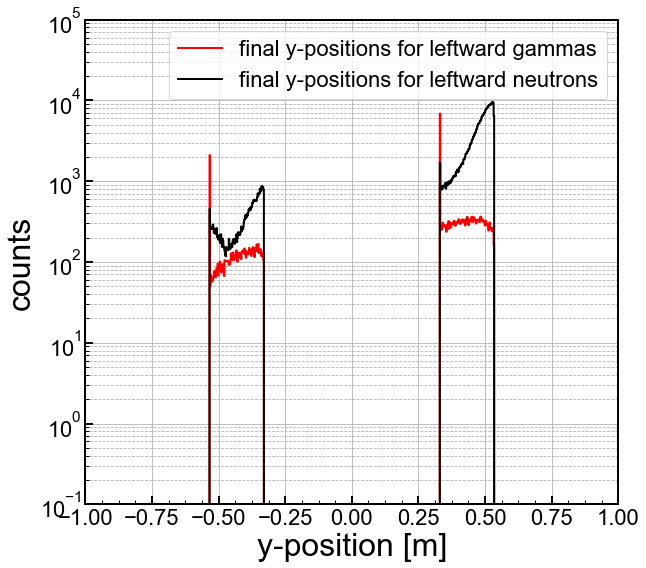

In [9]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

ax1.step(xc,n_g, where='mid',color='r', linestyle='-', \
         label='final y-positions for leftward gammas', linewidth=2)
ax1.step(xc,n_n, where='mid',color='k', linestyle='-', \
         label='final y-positions for leftward neutrons', linewidth=2)




#tlabel = 'Thresh. {0} eV$_{{\mathrm{{ee}}}}$'.format(18)
#ax1.axvline(thresh, color='k', linestyle='--', lw=2, alpha=0.8,label=tlabel)
#erange_x = np.arange(thresh-sigthr, thresh+sigthr, 0.01)
#ax1.fill_between(erange_x, ymin, ymax, facecolor='r', alpha=0.3)

ax1.set_yscale('log')
ax1.set_xlim(-ymax, ymax) #in pairs
ax1.set_ylim(0.1,1e5)
ax1.set_xlabel('y-position [m]',**axis_font)
ax1.set_ylabel('counts',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/R68_ypos_polycrossings.png')
plt.show()